# Venture Capital Project
## Preliminary Analysis 


In [21]:
library(readxl)
library(tidyverse)
library(ggthemes)


In [23]:
setwd("~/Desktop/Prelim")    # Where files are located 
ukpre <-  read_excel("UK to 2002.xlsx", sheet = 'Data')
ukpost <- read_excel("UK 2002 - 2009.xlsx", sheet = 'Data')  
uspre <- read_excel("US to 2002.xlsx", sheet = 'Data')
uspost <- read_excel("US 2002 - 2009.xlsx", sheet = 'Data')
ukpost2 <- read_excel("UK 2009 to 2020.xlsx", sheet = 'Data')
uspost2 <- read_excel("US 2009 to 2020.xlsx", sheet = 'Data')


In [24]:
# Defining Variables 
# Law variable 
ukpre$law <- 0 
ukpost$law <- 1 
ukpost2$law <- 1
uspre$law <- 0 
uspost$law <- 0 
uspost2$law <- 0

# Country , don't need to do US, dummy variable trap 
ukpre$uk <- 1
ukpost$uk <- 1 
ukpost2$uk <- 1
uspre$uk <- 0
uspost$uk <- 0 
uspost2$uk <- 0


## Creating final df 
df <- rbind(ukpre,ukpost,uspre,uspost,ukpost2,uspost2)
str(df)


tibble [2,192 × 30] (S3: tbl_df/tbl/data.frame)
 $ Fund ID                   : num [1:2192] 4603 2244 2243 2278 1134 ...
 $ Firm ID                   : num [1:2192] 152327 4 4 908 431 ...
 $ Fund Name                 : chr [1:2192] "1818 SBIC Fund" "3i UK Investment Partners" "3i UKIP II" "Alpha Private Equity Fund 4" ...
 $ Firm Name                 : chr [1:2192] "Brown Brothers Harriman" "3i" "3i" "Alpha Group" ...
 $ Vintage                   : num [1:2192] 2002 1996 1997 2002 2001 ...
 $ Status                    : chr [1:2192] "Liquidated" "Liquidated" "Liquidated" "Liquidated" ...
 $ Fund Value (mn)           : chr [1:2192] "100 USD" "415 GBP" "378 GBP" "500 EUR" ...
 $ Fund Value (mn USD)       : num [1:2192] 100 633 622 436 232 ...
 $ Fund Value (mn EUR)       : num [1:2192] 95.4 505.5 542.3 500 184.1 ...
 $ Fund Target Value (mn)    : chr [1:2192] NA NA NA "500 EUR" ...
 $ Fund Target Value (mn USD): num [1:2192] NA NA NA 493 282 ...
 $ Fund Target Value (mn EUR): num [1:2192

In [25]:
## Change variable datatypes 
# df$Vintage <- as.factor(df$Vintage) should we use them as factors ? 
df$`Net IRR (%)` <- as.integer(df$`Net IRR (%)`)
df$law <- as.factor(df$law)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Warning message:
“Removed 363 rows containing non-finite values (stat_boxplot).”

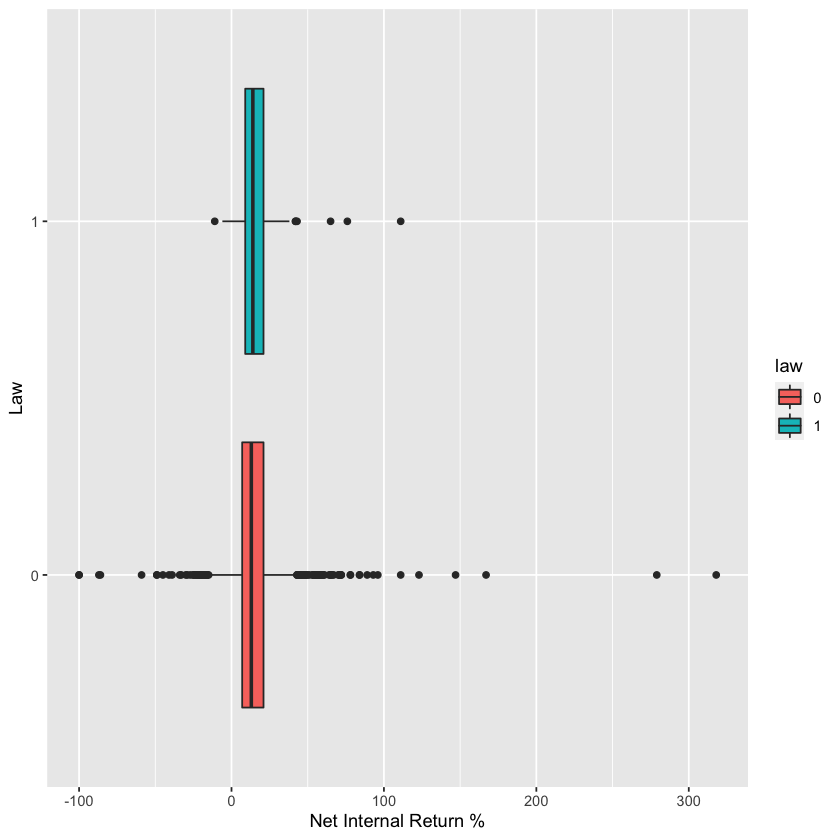

In [26]:
### EDA 
ggplot(data=df, aes(y= `Net IRR (%)`, x=law, fill=law ) ) + 
  geom_boxplot() +  coord_flip() + ylab("Net Internal Return %") + xlab("Law") 

In [36]:
### Preliminary regression 
fit = lm(`Net IRR (%)` ~ Vintage + Status  + Type  + `Distr. (%) DPI` +
            `Fund Value (mn USD)` + `Bench Net IRR (%)` + `Region Focus` + law + uk ,data=df)

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.676141e+03,1.464221e+02,-11.44732485,2.664237e-29
Vintage,8.242030e-01,7.262830e-02,11.34823476,7.678934e-29
StatusLiquidated,1.162118e+00,1.019575e+00,1.13980630,2.545246e-01
TypeGrowth,-1.633763e-01,1.084522e+00,-0.15064359,8.802744e-01
TypeMezzanine,-2.299530e-01,1.019458e+00,-0.22556392,8.215672e-01
TypeTurnaround,4.291234e+00,2.889708e+00,1.48500618,1.377242e-01
`Distr. (%) DPI`,1.123625e-01,3.224886e-03,34.84232380,5.049672e-202
`Fund Value (mn USD)`,-8.147918e-05,1.764218e-04,-0.46184310,6.442518e-01
`Bench Net IRR (%)`,5.910400e-01,6.734826e-02,8.77587629,3.980318e-18
`Region Focus`Asia,2.328873e+01,1.502097e+01,1.55041475,1.212247e-01


In [37]:
### Preliminary regression 
fit2 = lm(`Net IRR (%)` ~ Vintage + Status  + Type  + `Distr. (%) DPI` +
            `Fund Value (mn USD)` + `Bench Net IRR (%)` + `Region Focus` + law + uk + Quartile ,data=df)

summary(fit2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.044654e+03,1.366397e+02,-7.64531524,3.435251e-14
Vintage,5.171601e-01,6.770466e-02,7.63847068,3.616564e-14
StatusLiquidated,1.096871e+00,9.236172e-01,1.18758207,2.351612e-01
TypeGrowth,-5.951368e-01,9.829386e-01,-0.60546691,5.449483e-01
TypeMezzanine,-2.803266e-01,9.235730e-01,-0.30352403,7.615271e-01
TypeTurnaround,3.880523e+00,2.618358e+00,1.48204427,1.385107e-01
`Distr. (%) DPI`,7.731301e-02,3.440199e-03,22.47341263,2.439236e-98
`Fund Value (mn USD)`,-6.652046e-05,1.598595e-04,-0.41611833,6.773751e-01
`Bench Net IRR (%)`,7.562562e-01,6.168585e-02,12.25979919,3.406056e-33
`Region Focus`Asia,1.990004e+01,1.360569e+01,1.46262675,1.437513e-01


In [39]:
df_alt <- df %>%
    mutate_if(is.character,as.factor)
str(df_alt)

tibble [2,192 × 30] (S3: tbl_df/tbl/data.frame)
 $ Fund ID                   : num [1:2192] 4603 2244 2243 2278 1134 ...
 $ Firm ID                   : num [1:2192] 152327 4 4 908 431 ...
 $ Fund Name                 : Factor w/ 2044 levels "1315 Capital",..: 8 12 13 84 168 305 306 308 370 371 ...
 $ Firm Name                 : Factor w/ 704 levels "1315 Capital",..: 110 3 3 22 54 105 105 106 129 129 ...
 $ Vintage                   : num [1:2192] 2002 1996 1997 2002 2001 ...
 $ Status                    : Factor w/ 5 levels "Closed","First Close",..: 3 3 3 3 3 3 1 3 3 3 ...
 $ Fund Value (mn)           : Factor w/ 1001 levels "1 USD","1,000 CAD",..: 125 623 561 706 174 992 113 607 508 564 ...
 $ Fund Value (mn USD)       : num [1:2192] 100 633 622 436 232 ...
 $ Fund Value (mn EUR)       : num [1:2192] 95.4 505.5 542.3 500 184.1 ...
 $ Fund Target Value (mn)    : Factor w/ 223 levels "1,000 CAD","1,000 EUR",..: NA NA NA 169 76 NA 18 137 NA NA ...
 $ Fund Target Value (mn USD): num [1:

## Further Questions/Comments 
•	What to do with Nulls ? 
•	Regional focus is different(i.e In the UK dataset there is a geographical focus and general partner location in the US). What exactly does this mean and how should we account for this? 8 )  

•	Industry focus increases the 𝑅2 (both multiple and adjusted) of the regression model significantly but it has 1016 levels  
•	Location focus increases the 𝑅2 (both multiple and adjusted) regression model significantly but it has 158 levels  
•	Quartile is also significantly increases the an important (Should we include it?) 

•	The P value on the law coefficent (0.06679527) is not statistically significant at the 5% level, but I belive that there is some evidence that we can investigate this further with some causal analysis.

In [48]:
nlevels(df_alt$'Industry Focus')  
nlevels(df_alt$'Location Focus')  


[1] 1016

[1] 158

In [49]:
summary(fit)


Call:
lm(formula = `Net IRR (%)` ~ Vintage + Status + Type + `Distr. (%) DPI` + 
    `Fund Value (mn USD)` + `Bench Net IRR (%)` + `Region Focus` + 
    law + uk, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.535  -5.426  -1.226   3.904 244.857 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.676e+03  1.464e+02 -11.447   <2e-16
Vintage                                   8.242e-01  7.263e-02  11.348   <2e-16
StatusLiquidated                          1.162e+00  1.020e+00   1.140   0.2545
TypeGrowth                               -1.634e-01  1.085e+00  -0.151   0.8803
TypeMezzanine                            -2.300e-01  1.019e+00  -0.226   0.8216
TypeTurnaround                            4.291e+00  2.890e+00   1.485   0.1377
`Distr. (%) DPI`                          1.124e-01  3.225e-03  34.842   <2e-16
`Fund Value (mn USD)`                    -8.148e-05  1.764e-04  -0.462   0.6

In [51]:
6.679527e-02

[1] 0.06679527